# <u>Iris Species</u>

##  Data

The data being used is a simple data about Iris flowers with differnt columns containing information about them. Flowers have 3 different species.

Data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Four columns are given for each sample:  length and width of sepals and petals(cm)

## Problem statement

Classify iris plants into three species in this classic dataset.

## Steps of running a ML model
<ul>
<li>**Step 1. Get the Data**</li>
<li>**Step 2. Prepare the Data**</li>
<li>**Step 3. Create Training and Testing sets**</li>
<li>**Step 4. Choosing a model**</li>
<li>**Step 5. Training the model**</li>
<li>**Step 6. Evaluation**</li>
<li>**Step 7. Optimization**</li>
<li>**Step 8. Prediction (Created Model into the Action)**</li>
</ul>  

## <font color=blue>Step 1: Get the data</font>

## Importing libraries

In [49]:
import pandas as pd # importing pandas and renaming it as pd for easier use
import matplotlib.pyplot as plt #import and rename
import seaborn as sns #import and rename

## Loading dataset into a dataframe

**Dataframe:** A dataframe is like a table which can have different columns of different datatypes. Basically you need a dataframe to store all the data into a variable which can be used and modified within the code without affecting the source data where you read it from.

In [50]:
df=sns.load_dataset('iris')

IRIS dataset comes with the in-built libraries.So, we used **sns.load_dataset **<br>Alternatively we can download the dataset and load it using **pd.read_csv()** function and specifying the path of the files as parameter to .read_csv(). Pandas provides  file reading of other formats as well.


## <font color=blue>Step 2: Prepare the data</font>

**Before preparation we need to see the data quality using Exploratory Data Analysis. If we find issues in the data, then we will prepare(fix) it accordingly**

## Exploratory Data Analysis(EDA)

**Exploratory data analysis is important for determining what steps are needed to be taken for data preparation.**

**It includes statistical metrics, visualizations on overall and columns combination level.**

**Below are some primary checks to start with**

### Looking at the data to see how the rows and columns are 

**This .head() function allows to see first 5 rows for dataset by default. For checking more rows,like 10, use df.head(10)**

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**.shape gives the number of rows and columns in dataframe**

In [52]:
df.shape

(150, 5)

**This .info() function gives information about the total number of non-null rows in each column along with name and datatype**

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**For each column. .describe gives the basic descriptive statistics values **

In [54]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking the frequency in each category of Target variable(It is 50 in each of them,this means the data is balanced)**

In [55]:
df["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

### Visualizations

NOTE:<br><br> Do not worry about the functions and parameters.<br> 
Focus more on how something is being used to get insights. In course of time, you'll get familiar with useful functions and how to play with them.

**Boxplot is used for checking if there are any outliers so that we can treat them beforehand.<br>
So here we see, for each of the three categories of Iris flowers, what are the outliers in sepal_width column.<br>
If there are points outside the colour boxes on the corresponding vertical lines, it indicates presence of outliers.**

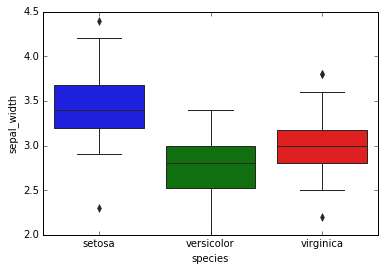

In [56]:
sns.boxplot(x="species", y="sepal_width", data=df)

**Visualizing relation between sepal width and length**

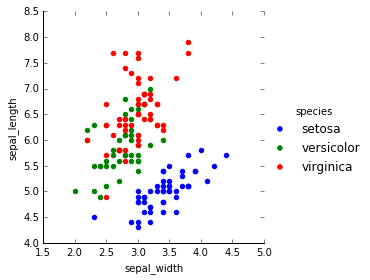

In [57]:
sns.FacetGrid(df,hue="species",height=4).map(plt.scatter,"sepal_width","sepal_length").add_legend()
plt.show()

**Visualizing relation between petal width and length**

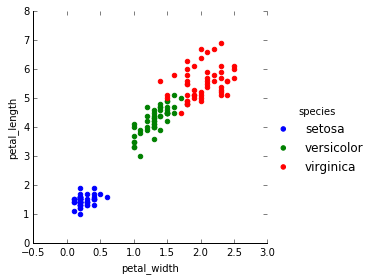

In [58]:
sns.FacetGrid(df,hue="species",height=4).map(plt.scatter,"petal_width","petal_length").add_legend()
plt.show()

**You see in above two visualizations,the categories are more separable when we use petal width and length. This means that petals are better parameters in terms of predicting the category **

**We want all graphs of the target variable(Species) w.r.t. of each pair of columns. So use .pairplot()**

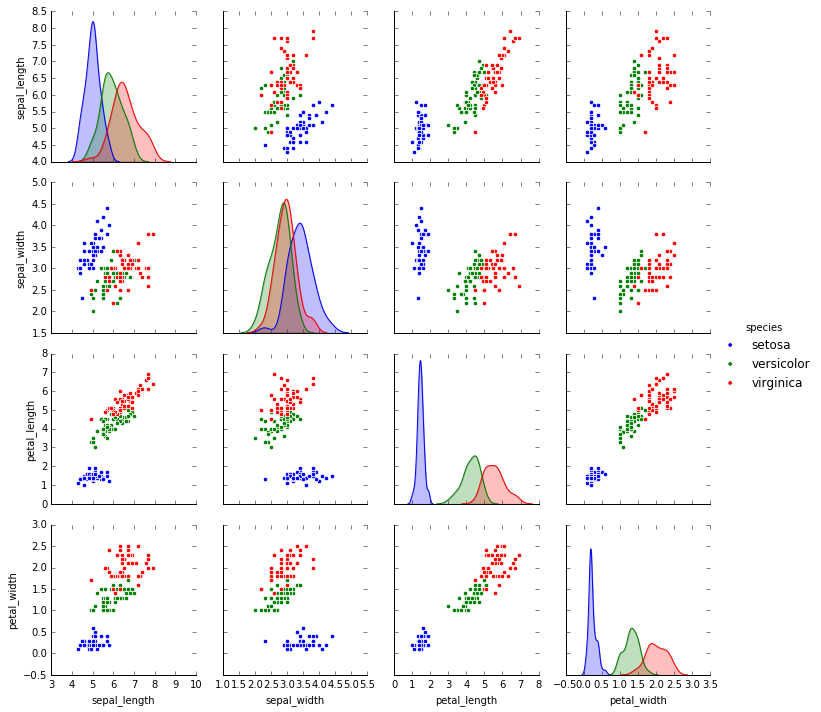

In [59]:
sns.pairplot(df,hue="species")

**Tips:**<br><br><li><font color=SALMON>**use "Tab" in case you don't remember the fullname of function or don't remember at all  but know the package it was in. **</font></li><br><font color=SALMON>**Like for sns.pairplot(), type "sns." and hit Tab button. It will open list all the functions within seaborn.**</font>
<br><br><li><font color=SALMON>**For hyperparameters to be passed into above function, do sns.pairplot(), click between the brackets and hit "Shift + Tab". This will open the official documentation of the function where you can find examples,hyperparameters and explanation of that function.**</font></li>


## <font color=blue>Step 3: Create Training and Testing sets</font>

In [60]:
from sklearn.model_selection import train_test_split   #importing function for splitting the data into train-test

In [61]:
X=df.drop("species",axis=1)    # we separate the data of all columns except the target column "Species"

y=df["species"]                #we separate the target column "Species"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # split ratio 7:3(test_size=0.3) 

# 4 dataframes are created

# X_train: All columns data except "Species" from the 70% train data
# X_test: All columns data except "Species" from the 30% test data
# y_train: Data of "Species" from the 70% train data
# y_test: Data of "Species" from the 30% test data


In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## <font color=blue>Step 4: Choosing a model</font>

**NOTE: Here we are just doing the implementation. It is very important to know how these model algorithms works and how they are different from each other. Please do read about different models.**

**Logistic Regression Model**<br><br> Don't get confused by the name Regression. Logistic regression is a classification model

In [63]:
from sklearn.linear_model import LogisticRegression  #importing function of LogisticRegression from libraries

LR = LogisticRegression()     # creating an object of the logisticRegression() to train further

## <font color=blue>Step 5: Training the model</font>

In [64]:
LR.fit(X_train,y_train) # training the creating object using .fit() 

# for training both X_train and corresponding y_train are required

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## <font color=blue>Step 6: Evaluation</font>

In [65]:
prediction1=LR.predict(X_test) # passing the values to categorize them using the trained model LR. Using .predict() function

# for testing, trying to predict the classes of data contaied in X_test. So, only x_test is passed

In [66]:
from sklearn.metrics import accuracy_score 

In [67]:
print('The accuracy of the Logistic Regression is',accuracy_score(y_test, prediction1)) 

#comparing the actual values of classes of x_test and predicted values of classes of x_test   [(y_test,prediction1)]

The accuracy of the Logistic Regression is 0.9777777777777777


In [68]:
# importing other libraries
from sklearn.metrics import confusion_matrix   # this will be 3x3 matrix as we have 3 classes in Target variable
from sklearn.metrics import classification_report # this gives a detailed report of performance

In [69]:
print(confusion_matrix(y_test,prediction1))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


**Above is a predicted class vs actual class matrix. The numbers in diagonals represent the count of instances correctly predicted across different classes<br><br>We had total 45 test values<br><br>19 instances were there of class 1 and all predicted correctly as class 1<br>13 instances of class 2, 12 predicted correctly as class 2 and 1 predicted wrong as class 3 <br>13 instances of class 3 and all predicted correctly as class 3**

In [70]:
print(classification_report(y_test,prediction1))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      0.92      0.96        13
  virginica       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



## <font color=blue>Step 7: Optimization</font>

There are several ways of optimizing the model. One of the ways is hyperparameter tuning

The hyperparameters in the bracket are the values that needs to be adjusted for optimizing the model

<pre>LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,<br><pre>
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,<br>
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,<br>
          verbose=0, warm_start=False)

**Let's try other models repeating steps 4,5,6 and compare the performance **

**Support Vector Mchine(SVM) Model**<br> SVM comes in 2 variants : Support vector classifier and Support vector regressor 

In [71]:
from sklearn.svm import SVC # importing Support vector Classifier(SVC) as this is a classifiction problem

In [72]:
svm=SVC() # creating object of svm

In [73]:
svm.fit(X_train,y_train) # training the created object

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
prediction2=svm.predict(X_test) # predicting for test purpose

In [75]:
print('The accuracy of the SVM is',accuracy_score(y_test, prediction2)) # comparing the predicted values with the actual values

The accuracy of the SVM is 1.0


In [76]:
print(confusion_matrix(y_test,prediction2))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [77]:
print(classification_report(y_test,prediction2))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



**Decision tree model**<br>Decision Tree comes in 2 variants :DecisionTreeClassifier and DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier as this is a classifiction problem

In [79]:
DT=DecisionTreeClassifier() # creating object of Decision tree

In [80]:
DT.fit(X_train,y_train) # training the created object

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
prediction3=DT.predict(X_test)# predicting for test purpose
print('The accuracy of the Decision Tree is',accuracy_score(y_test, prediction3))# comparing the predicted values with the actual values

The accuracy of the Decision Tree is 1.0


In [82]:
print(confusion_matrix(y_test,prediction3))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [83]:
print(classification_report(y_test,prediction3))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



## <font color=blue>Step 8: Prediction</font>

Now when the performance of models is satisfactory, we can use the trained models for the pupose it was built for.<br><br> There is no difference in the final prediction method from the prediction we did while testing the model performance. The new values to predict will be passed to the model we will get the predicted classes as results.<br><br>

**predicted_results=model.predict(dataframe_having_new_data_with_all_columns_except__"Species_column")<br>
predicted_results will have one column of the results- species for each row**

#### <font color=green>Great!  So now when you have learnt how to create ML models,  these are next steps that you would want to take:</font>
<ul>
<li>Learn more components of EDA in detail</li>
<li>Explore more models</li>
<li>Learn more about the algorithmic details, pros and cons ,hyperparameters etc.  related to each model you learnt</li>
<li>Explore the use cases of each of them</li>
<li>Try out beginner level datasets from Kaggle</li>
<li>See the approach of other people from their solution</li>

<li>Find a study buddy and keep practising :)</li>
</ul>  